# Classification supervisée

## Importation et préparation des données

In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
df = pd.read_csv("labeling/labeled_data.csv")
df = df.drop(['Unnamed: 0', 'adressebis', 'objet', 'adresse'], axis=1)
df

,corps,cat
0,"['dear', 'student', 'ambassador', 'lutt', 'you...",Université
1,"['english', ']', 'dear', 'fellow', 'student', ...",Université
2,"['this', 'confirmation', 'password', 'instagra...",Account & Password
3,"['de', 'michel', 'legault', 'sport', 'cc', 'sd...",Université
4,"['confirmation', 'trip', 'monday', 'november',...",Commandes/Tickets
...,...,...
9995,"['imagine', 'explore', 'build', 'tedxwoman', '...",Publicité
9996,"['welcome', 'welcome', 'welcome', 'lutt', 'her...",Université
9997,"['hello', 'the', 'rucher', 'creative', 'offer'...",Université
9998,"['techcrunch', 'newsletter', 'saturday', 'apri...",Publicité


In [3]:
i=0
while i < len(df):
    df['corps'][i] = ast.literal_eval(df['corps'][i])
    df['corps'][i] = ' '.join(df['corps'][i])
    i+=1

df

,corps,cat
0,dear student ambassador lutt you make promotio...,Université
1,english ] dear fellow student for four week mo...,Université
2,this confirmation password instagram account o...,Account & Password
3,de michel legault sport cc sds envoy wednesday...,Université
4,confirmation trip monday november hello you pl...,Commandes/Tickets
...,...,...
9995,imagine explore build tedxwoman event tedxpaju...,Publicité
9996,welcome welcome welcome lutt here procedure fo...,Université
9997,hello the rucher creative offer velos scholars...,Université
9998,techcrunch newsletter saturday april hi m greg...,Publicité


<AxesSubplot: >

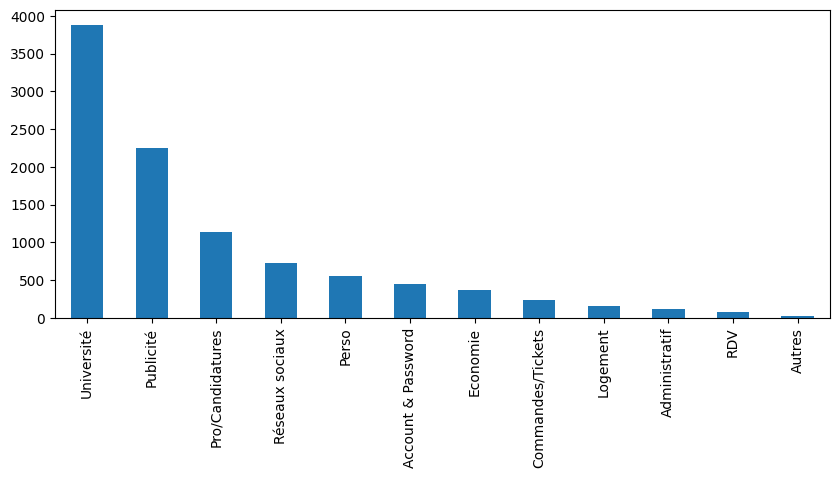

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df.cat.value_counts().plot(kind='bar')

In [5]:
df['corps'].apply(lambda x: len(x.split(' '))).sum()

943142

In [6]:
from sklearn.model_selection import train_test_split

X = df['corps']

y = df['cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Naive Bayes Classifier for Multinomial Models

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

nb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
                ])

nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7106666666666667
                    precision    recall  f1-score   support

Account & Password       0.98      0.37      0.53       125
     Administratif       0.00      0.00      0.00        38
            Autres       0.00      0.00      0.00         9
 Commandes/Tickets       0.00      0.00      0.00        61
          Economie       1.00      0.36      0.53       106
          Logement       0.00      0.00      0.00        44
             Perso       0.95      0.11      0.20       158
  Pro/Candidatures       0.96      0.42      0.59       347
         Publicité       0.80      0.80      0.80       662
               RDV       0.00      0.00      0.00        14
   Réseaux sociaux       0.98      0.65      0.78       229
        Université       0.63      1.00      0.77      1207

          accuracy                           0.71      3000
         macro avg       0.52      0.31      0.35      3000
      weighted avg       0.74      0.71      0.66      3000



c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 2. Linear Support Vector Machine

In [8]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=5, tol=None)),
                ])

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9166666666666666
                    precision    recall  f1-score   support

Account & Password       0.83      0.80      0.82       125
     Administratif       0.91      0.76      0.83        38
            Autres       0.89      0.89      0.89         9
 Commandes/Tickets       0.83      0.82      0.83        61
          Economie       0.92      0.92      0.92       106
          Logement       0.78      0.80      0.79        44
             Perso       0.79      0.73      0.76       158
  Pro/Candidatures       0.93      0.86      0.89       347
         Publicité       0.93      0.94      0.93       662
               RDV       0.90      0.64      0.75        14
   Réseaux sociaux       0.97      0.94      0.96       229
        Université       0.93      0.97      0.95      1207

          accuracy                           0.92      3000
         macro avg       0.88      0.84      0.86      3000
      weighted avg       0.92      0.92      0.92      3000



## 3. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                ])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.9153333333333333
                    precision    recall  f1-score   support

Account & Password       0.81      0.84      0.82       125
     Administratif       0.90      0.71      0.79        38
            Autres       1.00      0.89      0.94         9
 Commandes/Tickets       0.73      0.75      0.74        61
          Economie       0.92      0.92      0.92       106
          Logement       0.77      0.82      0.79        44
             Perso       0.75      0.82      0.78       158
  Pro/Candidatures       0.89      0.88      0.88       347
         Publicité       0.93      0.93      0.93       662
               RDV       0.83      0.71      0.77        14
   Réseaux sociaux       0.97      0.94      0.95       229
        Université       0.96      0.95      0.95      1207

          accuracy                           0.92      3000
         macro avg       0.87      0.85      0.86      3000
      weighted avg       0.92      0.92      0.92      3000

